In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

In [29]:
X_train = pd.read_csv('ShoppingData.csv')
df = X_train.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Text(0, 0.5, 'Frequency')

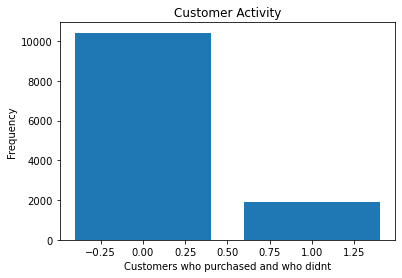

In [31]:
fig, ax = plt.subplots() 
data = X_train['Revenue'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_title('Customer Activity') 
ax.set_xlabel('Customers who purchased and who didnt') 
ax.set_ylabel('Frequency')

In [32]:
type(X_train)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Frequency')

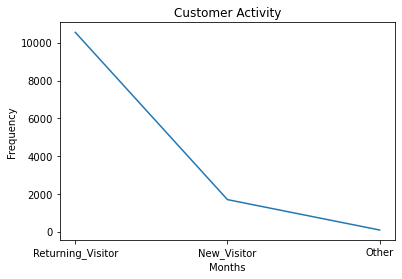

In [45]:
fig, ax = plt.subplots() 
data = X_train['VisitorType'].value_counts()
points = data.index 
frequency = data.values
ax.plot(points, frequency)
ax.set_title('Customer Activity over months') 
ax.set_xlabel('Months') 
ax.set_ylabel('Frequency')

In [74]:
dummiesdf = pd.get_dummies(df['VisitorType'])
df.drop('VisitorType', inplace = True, axis = 1)
df['New_Visitor'] = dummiesdf['New_Visitor']
df['Other'] = dummiesdf['Other']
df['Returning_Visitor'] = dummiesdf['Returning_Visitor']

In [75]:
dfmonth = pd.get_dummies(df['Month']) 
df.drop('Month', inplace = True, axis = 1)
dfwithdummies = pd.concat([df, dfmonth], axis = 1, sort = False)

In [76]:
dfwithdummies['Class'] = df['Revenue'].astype(int)
dfwithdummies.drop('Revenue', axis = 1, inplace = True)
dfwithdummies['Weekend'] = df['Weekend'].astype(int)
dfwithdummies.drop('Returning_Visitor', axis = 1, inplace = True)
dfcleaned = dfwithdummies.copy()

In [77]:
X = dfcleaned.drop('Class', axis = 1)
Y = dfcleaned['Class'].copy()

In [78]:
cor = X.corr()

<AxesSubplot:>

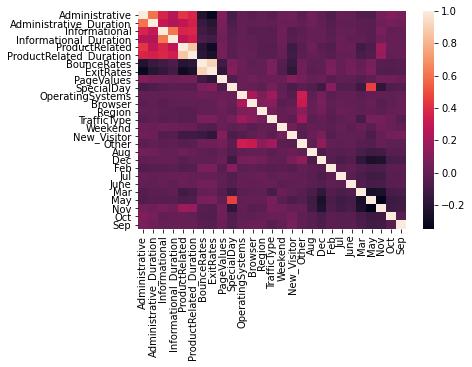

In [79]:
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [80]:
def AvgMinutes(Count, Duration):
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output
    
Columns = [['Administrative', 'Administrative_Duration'], ['Informational', 'Informational_Duration'], ['ProductRelated', 'ProductRelated_Duration']]
    
    
X['AvgAdministrative'] = X.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1)
X['AvgInformational'] = X.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
X['AvgProductRelated'] = X.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
X.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration'], axis = 1, inplace = True)

<AxesSubplot:>

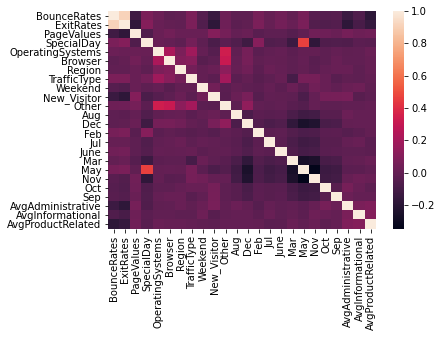

In [81]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [82]:
for i in X.columns:
    print('Feature:',i)
    print('# of N/A:',X[i].isna().sum())

Feature: BounceRates
# of N/A: 0
Feature: ExitRates
# of N/A: 0
Feature: PageValues
# of N/A: 0
Feature: SpecialDay
# of N/A: 0
Feature: OperatingSystems
# of N/A: 0
Feature: Browser
# of N/A: 0
Feature: Region
# of N/A: 0
Feature: TrafficType
# of N/A: 0
Feature: Weekend
# of N/A: 0
Feature: New_Visitor
# of N/A: 0
Feature: Other
# of N/A: 0
Feature: Aug
# of N/A: 0
Feature: Dec
# of N/A: 0
Feature: Feb
# of N/A: 0
Feature: Jul
# of N/A: 0
Feature: June
# of N/A: 0
Feature: Mar
# of N/A: 0
Feature: May
# of N/A: 0
Feature: Nov
# of N/A: 0
Feature: Oct
# of N/A: 0
Feature: Sep
# of N/A: 0
Feature: AvgAdministrative
# of N/A: 0
Feature: AvgInformational
# of N/A: 0
Feature: AvgProductRelated
# of N/A: 0


In [83]:
for i in X_train.columns:
    print('####################')
    print('COLUMN TITLE:',i)
    print('# UNIQUE VALUES:',len(X_train[i].unique()))
    print('UNIQUE VALUES:',X_train[i].unique())
    print('####################')
    print()

####################
COLUMN TITLE: Administrative
# UNIQUE VALUES: 27
UNIQUE VALUES: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
####################

####################
COLUMN TITLE: Administrative_Duration
# UNIQUE VALUES: 3335
UNIQUE VALUES: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
####################

####################
COLUMN TITLE: Informational
# UNIQUE VALUES: 17
UNIQUE VALUES: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
####################

####################
COLUMN TITLE: Informational_Duration
# UNIQUE VALUES: 1258
UNIQUE VALUES: [  0.   120.    16.   ... 547.75 368.25 211.25]
####################

####################
COLUMN TITLE: ProductRelated
# UNIQUE VALUES: 311
UNIQUE VALUES: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29

In [85]:
X_copy = X.copy()
rc = RobustScaler()
X_rc=rc.fit_transform(X_copy)
X_rc=pd.DataFrame(X_rc,columns=X.columns)


In [103]:
new_df = df[df['ProductRelated']== 3]

In [112]:
new_df = new_df[['ProductRelated_Duration','Revenue']] 
new_df

,ProductRelated_Duration,Revenue
9,738.00,False
10,395.00,False
22,105.00,False
31,78.00,False
41,22.00,False
...,...,...
12253,178.25,False
12289,88.50,False
12291,35.00,False
12303,172.00,False


In [105]:
X = np.array(new_df[['ProductRelated_Duration']]) 
y = np.array(new_df[['Revenue']])

In [106]:
print(X.shape) 
print(y.shape)

(458, 1)
(458, 1)


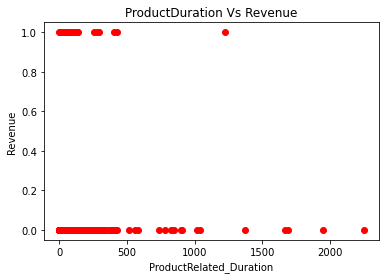

In [107]:
plt.scatter(X,y,color="red") 
plt.title('ProductDuration Vs Revenue')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Revenue')
plt.show()

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

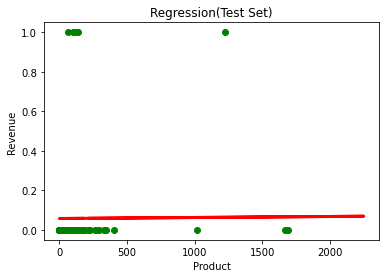

In [109]:
plt.scatter(X_test,y_test,color="green") 
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(Test Set)')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

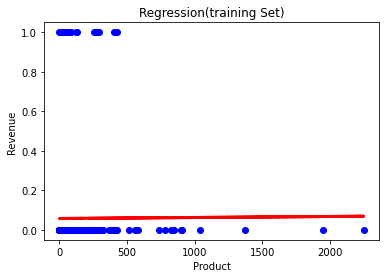

In [110]:
plt.scatter(X_train,y_train,color="blue")  
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(training Set)')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()